

---


# **Neural Network Assignment**


---

**Assignment**

* Create a deep learning model to predict heart disease in populations at risk.

* Data Source: Kaggle Heart Disease Dataset

* Create a neural network to predict heart disease using the given data:

1. Explore and clean the data if needed
2. Perform a train-test split on your data
3. Use a column transformer to scale the numeric features and one-hot encode the categorical features.
4. Define your base sequential model
5. Include the number of features of each sample in your input layer
6. Use the correct activation function and the correct number of neurons for your output layer
7. Compile your model with the correct loss function and an optimizer (‘adam’ is a fine choice)
8. Plot your model’s training history.
9. Evaluate your models with appropriate metrics.
* After you have created, fit, and evaluated your first model, try 2 more versions of it with different numbers of layers and neurons to see if you can create a model that scores better on the testing data.




---


**The columns in the dataset**


---


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up upsloping, Flat: flat, Down downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### **Our target is to classify whether a patient is have Heart Disease or not**

**import required libraries**

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.compose import make_column_transformer

**Check out the Data**

In [392]:
# Load Data
df = pd.read_csv('/content/heart.csv')

In [393]:
# First 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [394]:
tf.__version__

'2.9.2'

In [395]:
# totat rows and column in the data: / or the size of the data
df.shape

(918, 12)

In [396]:
# info about the  data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [397]:
# describe numerical columns the data:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [398]:
# describe categorical columns 

df.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [399]:
#checking duplicate values in dataset
df.duplicated().sum()

0

In [400]:
# column name of the data:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [401]:
#number of unique values in column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [402]:
# checking null values in dataset
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

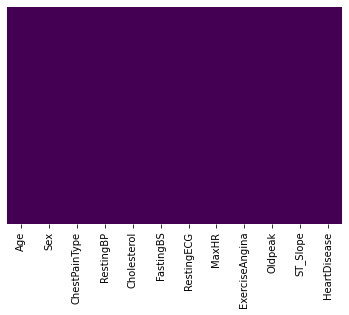

In [403]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Exploratory Data Analysis [EDA]**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc20230090>,
      dtype=object)

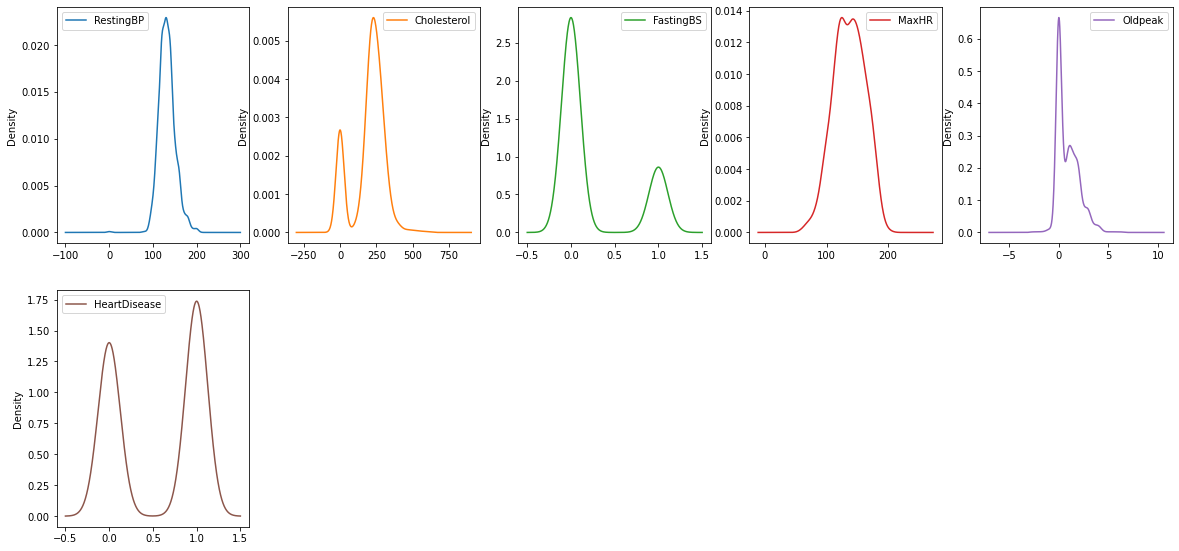

In [404]:
df.iloc[:, 1:].plot.density(subplots=True, 
layout=(4,5), figsize=(20, 20), sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc1fb5d790>,
      dtype=object)

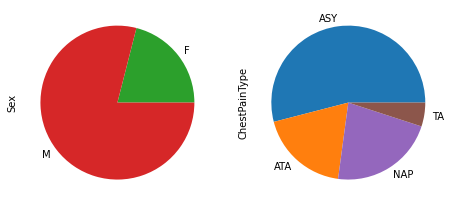

In [405]:
df.iloc[:, 1:3].apply(pd.Series.value_counts).plot.pie(subplots=True, layout=(2, 5), 
figsize=(20, 10), sharex = False, legend = False)

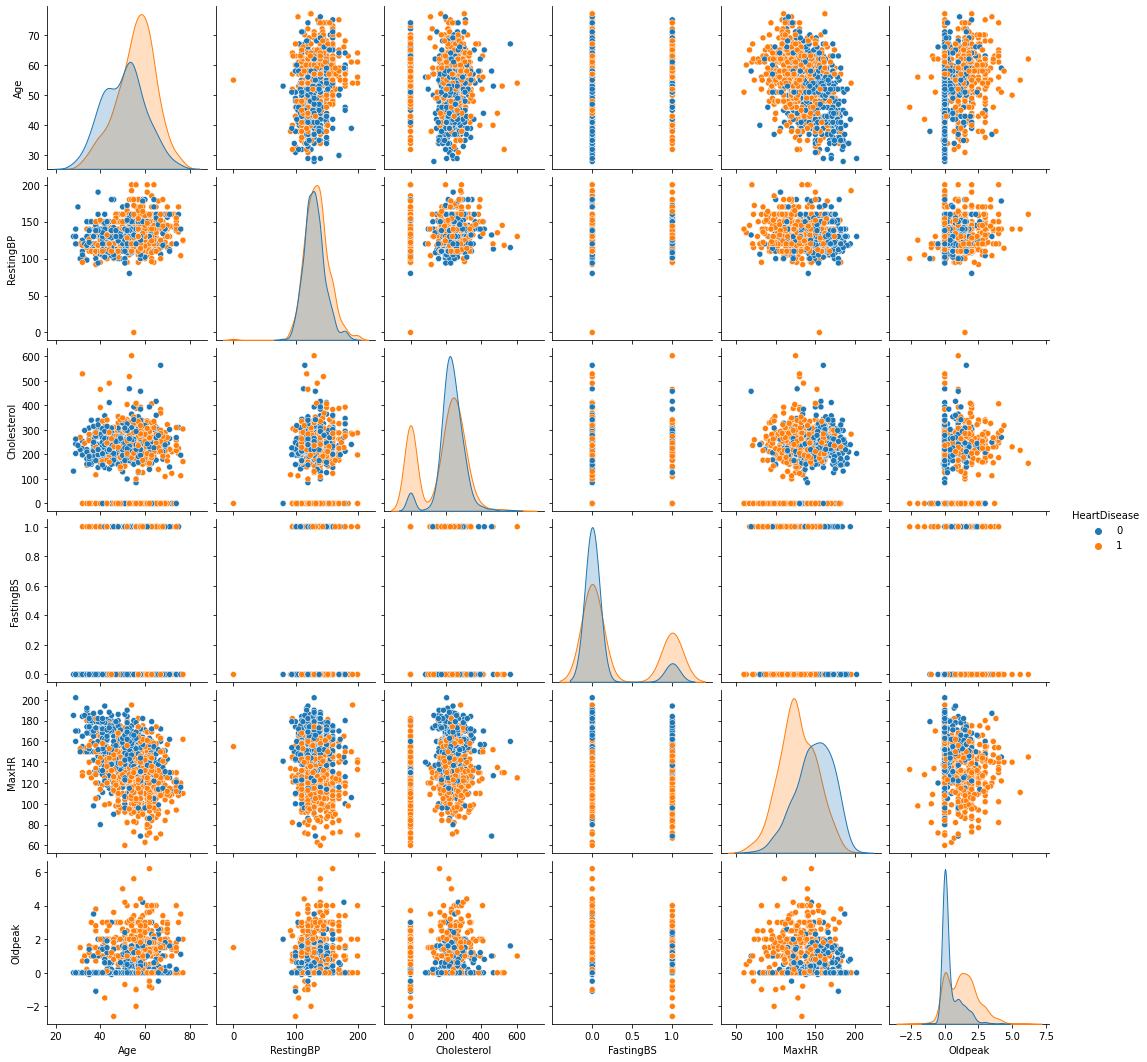

In [406]:
sns.pairplot(df, hue = "HeartDisease")

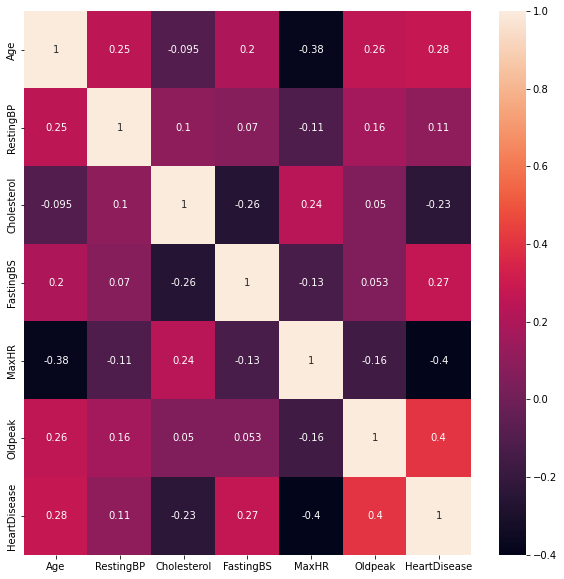

In [407]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

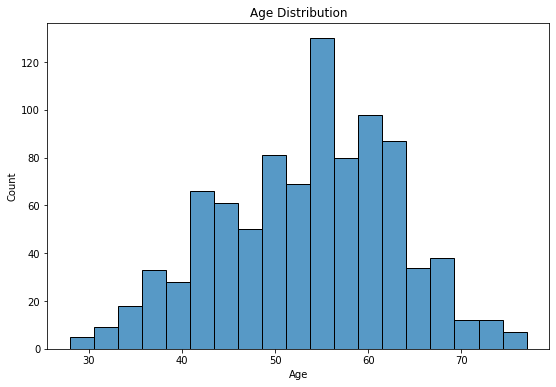

In [408]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x="Age", palette='rainbow')
plt.title('Age Distribution')
plt.show()

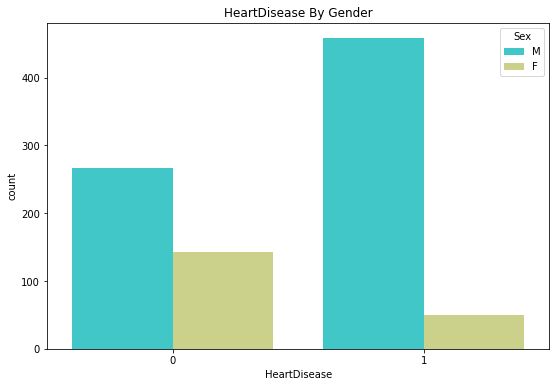

In [409]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='Sex', palette='rainbow')
plt.title('HeartDisease By Gender')
plt.show()

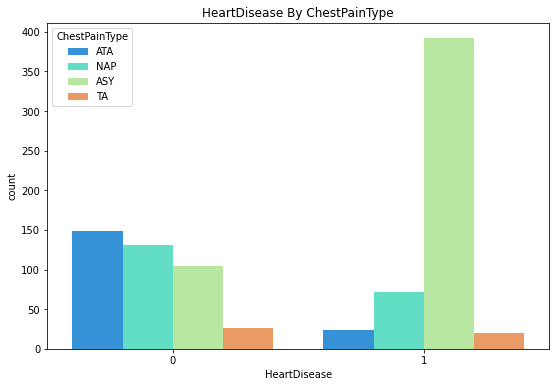

In [410]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ChestPainType', palette='rainbow')
plt.title('HeartDisease By ChestPainType')
plt.show()

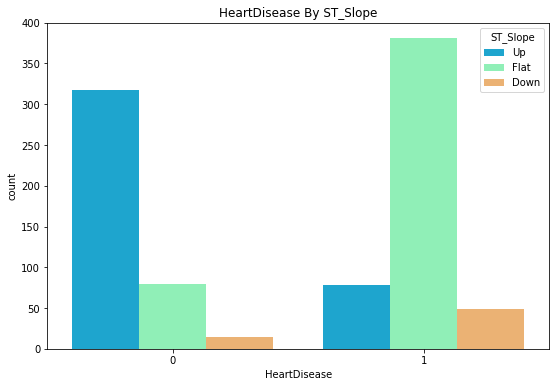

In [411]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ST_Slope', palette='rainbow')
plt.title('HeartDisease By ST_Slope')
plt.show()

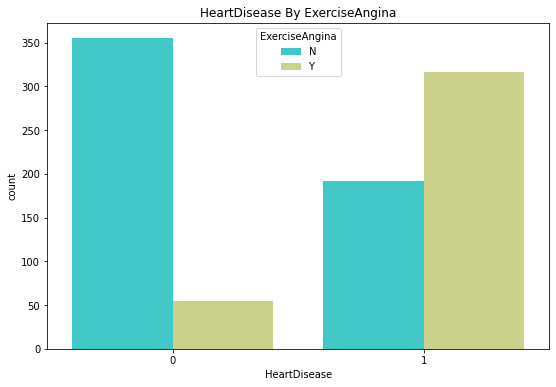

In [412]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ExerciseAngina', palette='rainbow')
plt.title('HeartDisease By ExerciseAngina')
plt.show()

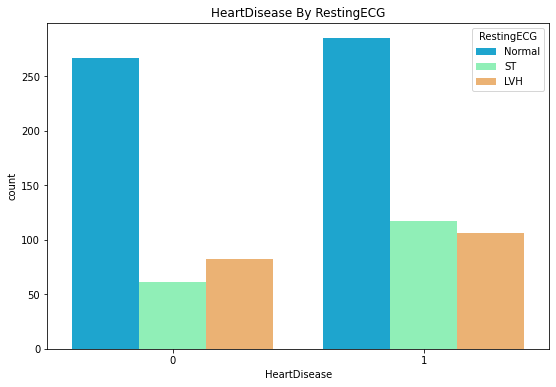

In [413]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='RestingECG', palette='rainbow')
plt.title('HeartDisease By RestingECG')
plt.show()

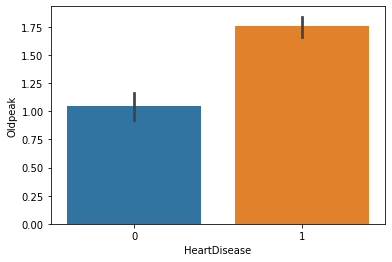

In [414]:
#Distribution of Oldpeak and HeartDisease 
df_HeartDisease = df[df.Oldpeak > 0]
sns.barplot(x="HeartDisease", y="Oldpeak", data=df_HeartDisease)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

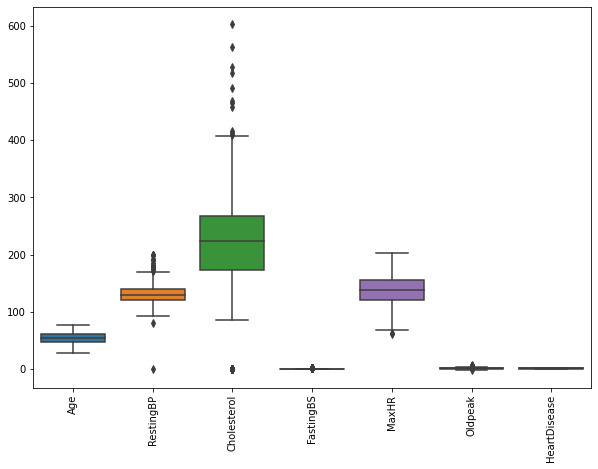

In [415]:
# outlire df
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

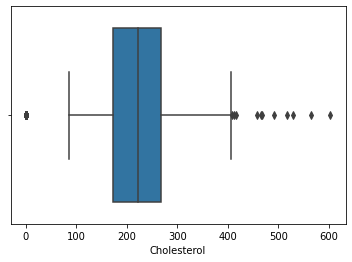

In [416]:
sns.boxplot(x='Cholesterol', data=df)

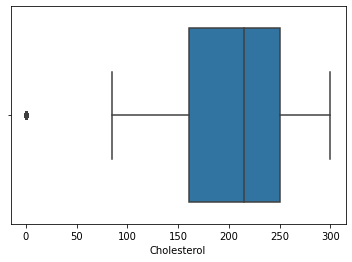

In [417]:
df = df[df['Cholesterol'] <= 300]
sns.boxplot(x='Cholesterol', data=df)

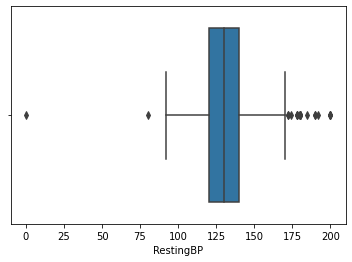

In [418]:
sns.boxplot(x='RestingBP', data=df)

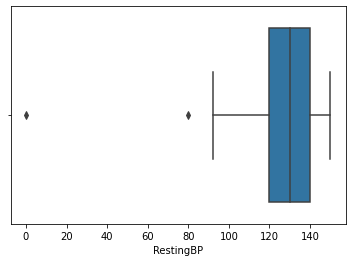

In [419]:
df = df[df['RestingBP'] <= 150]
sns.boxplot(x='RestingBP', data=df)

# **Data Preprocessing and Data Cleaning, Encoding categorical data**

### **Split dataset to features and target**

In [420]:
# Feature set 
# The columns included in the training 
X = df.iloc[:, 0:-1]

# The target will be the last column --> whether the patient have Heart Disease or not
y = df.iloc[:, -1]

In [421]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [422]:
y

0      0
2      0
3      1
4      0
6      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 717, dtype: int64

### **Column transformer to scale the numeric features_One-hot encoding the categorical features**

In [423]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
transformer = make_column_transformer((preprocessing.OneHotEncoder(), categorical_features),(preprocessing.StandardScaler(),
   ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']), 
remainder='passthrough',sparse_threshold=0, verbose_feature_names_out=False)

In [424]:
X = np.array(transformer.fit_transform(X))

In [425]:
X

array([[ 0.        ,  1.        ,  0.        , ..., -0.53380356,
         1.36750735, -0.80499091],
       [ 0.        ,  1.        ,  0.        , ..., -0.53380356,
        -1.56232124, -0.80499091],
       [ 1.        ,  0.        ,  1.        , ..., -0.53380356,
        -1.16639846,  0.63316146],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.53380356,
        -0.88925251,  0.34553098],
       [ 1.        ,  0.        ,  0.        , ..., -0.53380356,
         1.44669191, -0.80499091],
       [ 0.        ,  1.        ,  0.        , ..., -0.53380356,
         1.40709963, -0.80499091]])

In [427]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.350366,0.908022,1.095991,-0.533804,1.367507,-0.804991
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.667259,0.195867,1.034745,-0.533804,-1.562321,-0.804991
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.505319,0.765591,0.330417,-0.533804,-1.166398,0.633161
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.128466,1.620177,0.136472,-0.533804,-0.612107,-0.804991
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.822212,0.195867,0.565193,-0.533804,1.288323,-0.804991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.822212,-1.228442,0.840799,-0.533804,-0.216184,0.345531
713,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.607298,1.192884,0.116057,1.873348,0.140147,2.454821
714,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.445359,0.195867,-0.516817,-0.533804,-0.889253,0.345531
715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.445359,0.195867,0.554985,-0.533804,1.446692,-0.804991


### **Splitting the dataset to train and test**

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [429]:
X_train.shape, X_test.shape

((573, 20), (144, 20))

# **Building the ANN**

### Initializing the ANN

In [490]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [491]:
# The 1st hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the second hidden layer

In [492]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the output layer

In [493]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [494]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [495]:
# Note: use y_train.values and not y_train since this will raise an error

history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.7055 - accuracy: 0.5288
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5288
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5288
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5288
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5288
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5410
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6108
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6824
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7400
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7696
Epoch 11/

### **Predicting the Test set results**

In [496]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


## **Making the Confusion Matrix**

In [497]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.92      0.90      0.91        81

    accuracy                           0.90       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.90      0.90       144



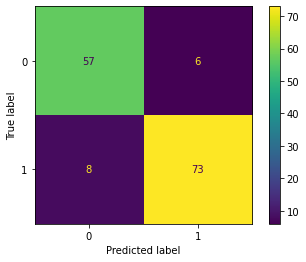

In [498]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


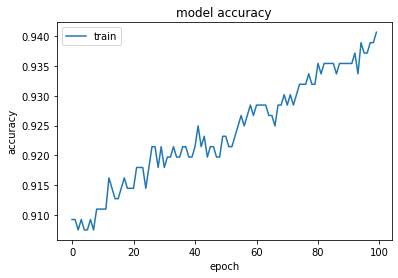

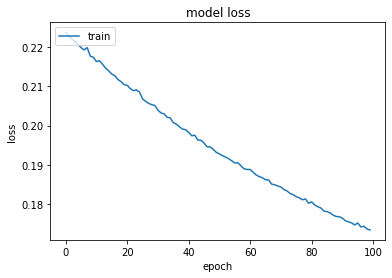

In [451]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Try 2 more versions the model with different numbers of layers and neurons**

## **Building the ANN - versions 1**

### Initializing the ANN

In [452]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [453]:
# The 1st hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the second hidden layer

In [454]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [455]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [456]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [457]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [458]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [459]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [460]:
# Note: use y_train.values and not y_train since this will raise an error

history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 0.6756 - accuracy: 0.6684
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.8272
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8464
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8534
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8569
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8586
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8709
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8831
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8883
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8918
Epoch 11/

### **Predicting the Test set results**

In [461]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


## **Making the Confusion Matrix**

In [462]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        63
           1       0.90      0.85      0.87        81

    accuracy                           0.86       144
   macro avg       0.86      0.86      0.86       144
weighted avg       0.86      0.86      0.86       144



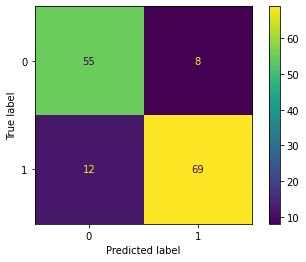

In [463]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


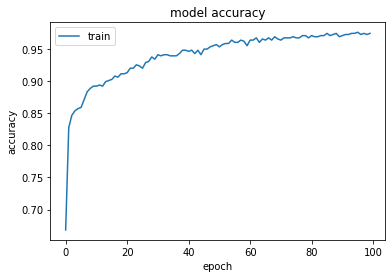

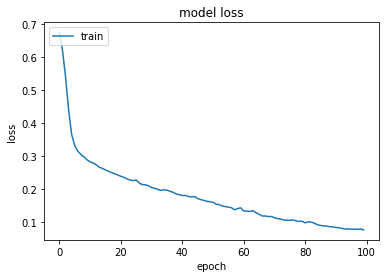

In [464]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Building the ANN - versions 2**

### Initializing the ANN

In [465]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [466]:
# The 1st hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [467]:
# The 1st hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the second hidden layer

In [468]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [469]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [470]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [471]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [472]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [473]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [474]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [475]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [476]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [477]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

In [478]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [479]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [480]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [483]:
# Note: use y_train.values and not y_train since this will raise an error

history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 50)

Epoch 1/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.8970
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 0.3388 - accuracy: 0.8970
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3387 - accuracy: 0.8970
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3386 - accuracy: 0.8970
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3385 - accuracy: 0.8970
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3384 - accuracy: 0.8970
Epoch 7/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3383 - accuracy: 0.8970
Epoch 8/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3382 - accuracy: 0.8970
Epoch 9/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3381 - accuracy: 0.8970
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.3380 - accuracy: 0.8970
Epoch 11/50
18/18

### **Predicting the Test set results**

In [484]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


## **Making the Confusion Matrix**

In [485]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        63
           1       0.89      0.86      0.87        81

    accuracy                           0.86       144
   macro avg       0.86      0.86      0.86       144
weighted avg       0.86      0.86      0.86       144



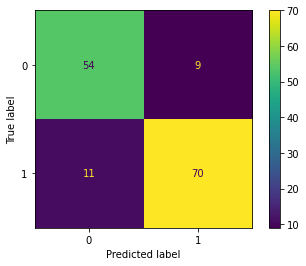

In [486]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


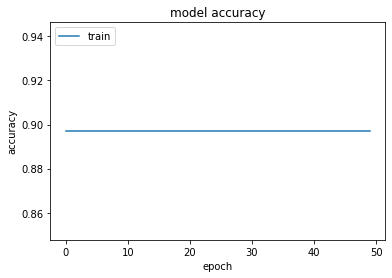

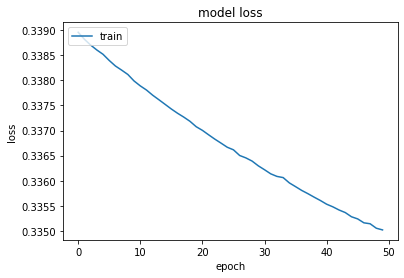

In [487]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()